In [1]:
import numpy as np
import vertex_cover
import dwave.inspector
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
from collections import defaultdict
from dwave.system import DWaveSampler, EmbeddingComposite
from dimod.reference.samplers import ExactSolver

In [2]:
sizes = [3, 5, 8, 10, 15, 20, 22, 23, 25]
vertex_cover_classical = []
vertex_cover_quantum = []
vertex_cover_exact = []

size_classical = []
size_quantum = []
size_exact = []

time_classical = []
time_quantum = []

dwave_samplesets = []

#sampler = EmbeddingComposite(DWaveSampler(token='DEV-70a769a910c76227b9aa7013a1b5be8443d46dee', solver=dict(qpu=True)))
sampler = ExactSolver()

for size in sizes:
    print("Problem Size : ", size)
    G = nx.gnm_random_graph(size, size, seed=42)
    #G = nx.complete_graph(size)
    h = defaultdict(int)
    J = defaultdict(int)
    penalty = 2

    ################ Classical Algorithm ################

    adjacency = np.array(nx.adjacency_matrix(G).todense())
    vc = vertex_cover.VertexCover(adjacency)
    cover_size, cover_classical, time = vc.get_vertex_cover()

    print("\tSolution (Classical) : ", cover_classical)

    size_classical.append(cover_size)
    vertex_cover_classical.append(cover_classical)

    ################ Quantum Algorithm ################

    for u, v in G.edges:
        J[(u,v)] += penalty

    for e in G.nodes:
        h[e] += (1 - G.degree[e] * penalty)
    
    sampleset = sampler.sample_ising(h=h, J=J, num_reads=100, label='minimum-vertex-cover')
    dwave_samplesets.append(sampleset)
    cover_quantum = [k for k,v in sampleset.first.sample.items() if v == 1]

    print("\tSolution (Quantum) : ", cover_quantum)

    size_quantum.append(len(cover_quantum))
    vertex_cover_quantum.append(cover_quantum)    

    ################'Exact' solution using DWave's implementation of the problem ################

    cover_exact = dnx.min_vertex_cover(G, sampler)
    
    print("\tSolution (Exact) : ", cover_exact)

    vertex_cover_exact.append(cover_exact)
    size_exact.append(len(cover_exact))

    ################ verify if quantum and classical solutions are valid ################

    print("")
    print("\tClassical Solution is a valid cover : ", dnx.is_vertex_cover(G, cover_classical))
    print("\tQuantum Solution is a valid cover : ", dnx.is_vertex_cover(G, cover_quantum))
    print("\tExact Solution is a valid cover : ", dnx.is_vertex_cover(G, cover_exact))
    print("")
    print("**************************************************************************")
    print("")
        

Problem Size :  3
	Solution (Classical) :  [0 1]
	Solution (Quantum) :  [0, 1]
	Solution (Exact) :  [1, 2]

	Classical Solution is a valid cover :  True
	Quantum Solution is a valid cover :  True
	Exact Solution is a valid cover :  True

**************************************************************************

Problem Size :  5
	Solution (Classical) :  [0 1 2 3]
	Solution (Quantum) :  [0, 1]
	Solution (Exact) :  [0, 1]

	Classical Solution is a valid cover :  True
	Quantum Solution is a valid cover :  True
	Exact Solution is a valid cover :  True

**************************************************************************

Problem Size :  8
	Solution (Classical) :  [0 1 2 3 4 7]
	Solution (Quantum) :  [0, 3, 7]
	Solution (Exact) :  [0, 3, 4]

	Classical Solution is a valid cover :  True
	Quantum Solution is a valid cover :  True
	Exact Solution is a valid cover :  True

**************************************************************************

Problem Size :  10
	Solution (Classical)

/home/rahul/.local/lib/python3.6/site-packages/dimod/core/sampler.py:221: SamplerUnknownArgWarning: Ignoring unknown kwarg: 'num_reads'
  return self.sample(bqm, **parameters)
/home/rahul/.local/lib/python3.6/site-packages/dimod/core/sampler.py:221: SamplerUnknownArgWarning: Ignoring unknown kwarg: 'label'
  return self.sample(bqm, **parameters)


	Solution (Quantum) :  [2, 3, 4, 7, 8, 13, 16, 17, 18]
	Solution (Exact) :  [0, 3, 6, 7, 8, 12, 13, 16, 18]

	Classical Solution is a valid cover :  True
	Quantum Solution is a valid cover :  True
	Exact Solution is a valid cover :  True

**************************************************************************

Problem Size :  22
	Solution (Classical) :  [ 0  1  2  3  4  6  7  8 13 16 17 18 19 21]
	Solution (Quantum) :  [2, 3, 5, 6, 8, 13, 14, 16, 17]
	Solution (Exact) :  [0, 2, 3, 6, 8, 13, 14, 19, 21]

	Classical Solution is a valid cover :  True
	Quantum Solution is a valid cover :  True
	Exact Solution is a valid cover :  True

**************************************************************************

Problem Size :  23
	Solution (Classical) :  [ 0  1  2  3  4  6  7  8 10 11 13 17 19 20 21 22]
	Solution (Quantum) :  [0, 2, 3, 6, 8, 13, 14, 17, 19, 22]
	Solution (Exact) :  [0, 2, 3, 6, 8, 13, 14, 17, 19, 20]

	Classical Solution is a valid cover :  True
	Quantum Solution is a val

In [3]:
print(dwave_samplesets[2])

     0  1  2  3  4  5  6  7 energy num_oc.
17  +1 -1 -1 +1 +1 -1 -1 -1  -18.0       1
241 +1 -1 -1 +1 -1 -1 -1 +1  -18.0       1
18  +1 +1 -1 +1 +1 -1 -1 -1  -16.0       1
22  +1 -1 +1 +1 +1 -1 -1 -1  -16.0       1
46  +1 -1 -1 +1 +1 +1 -1 -1  -16.0       1
102 +1 -1 +1 -1 +1 -1 +1 -1  -16.0       1
110 +1 -1 -1 +1 +1 -1 +1 -1  -16.0       1
142 +1 -1 -1 +1 -1 -1 +1 +1  -16.0       1
206 +1 -1 -1 +1 -1 +1 -1 +1  -16.0       1
238 +1 -1 -1 +1 +1 -1 -1 +1  -16.0       1
242 +1 +1 -1 +1 -1 -1 -1 +1  -16.0       1
246 +1 -1 +1 +1 -1 -1 -1 +1  -16.0       1
21  +1 +1 +1 +1 +1 -1 -1 -1  -14.0       1
41  +1 -1 +1 +1 +1 +1 -1 -1  -14.0       1
45  +1 +1 -1 +1 +1 +1 -1 -1  -14.0       1
81  +1 -1 -1 +1 +1 +1 +1 -1  -14.0       1
89  +1 -1 +1 -1 +1 +1 +1 -1  -14.0       1
101 +1 +1 +1 -1 +1 -1 +1 -1  -14.0       1
105 +1 -1 +1 +1 +1 -1 +1 -1  -14.0       1
107 -1 +1 +1 +1 +1 -1 +1 -1  -14.0       1
109 +1 +1 -1 +1 +1 -1 +1 -1  -14.0       1
137 +1 -1 +1 +1 -1 -1 +1 +1  -14.0       1
139 -1 +1 +

In [4]:
dwave.inspector.show(dwave_samplesets[2])

ValueError: invalid combination of arguments provided: if data capture not enabled, problem/response/solver have to be specified; also, make sure a structured problem is being inspected

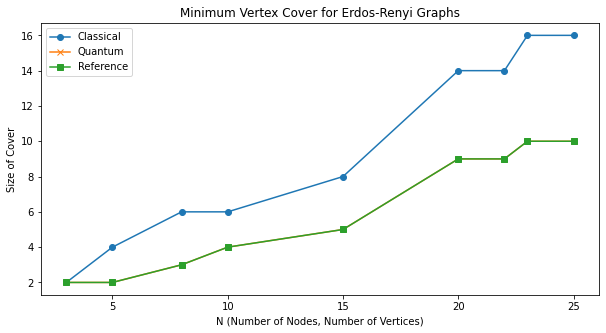

In [5]:
############### Comparison of estimated cover sizes ###############

plt.figure(figsize=(10,5))
plt.plot(sizes, size_classical, marker='o', label='Classical')
plt.plot(sizes, size_quantum, marker='x', label='Quantum')
plt.plot(sizes, size_exact, marker='s', label='Reference')
plt.xlabel('N (Number of Nodes, Number of Vertices)')
plt.ylabel('Size of Cover')
plt.title('Minimum Vertex Cover for Erdos-Renyi Graphs')
plt.legend()

In [6]:
time

4.25